In [3]:
tickers = [ "BEEF3.SA", "PETR4.SA", "SOJA3.SA", "GGBR3.SA", "CSNA3.SA", "VALE3.SA", "JBSS3.SA", "BRFS3.SA", "SUZB3.SA"]

In [1]:
import os
import shutil
import pandas as pd

def organizar_resultados_por_ticker_janela(diretorio_origem, diretorio_destino="resultados_organizados"):
    """
    Organiza os resultados de experimentos, agrupando-os por ticker e janela.
    
    Args:
        diretorio_origem: Diretório contendo os arquivos de resultados originais
        diretorio_destino: Diretório onde serão organizados os resultados
    """
    # Criar o diretório principal de destino se não existir
    if not os.path.exists(diretorio_destino):
        os.makedirs(diretorio_destino)
    
    # Verificar se o diretório de origem existe
    if not os.path.exists(diretorio_origem):
        print(f"O diretório de origem '{diretorio_origem}' não existe.")
        return
    
    # Listar todos os arquivos no diretório de origem
    arquivos = os.listdir(diretorio_origem)
    
    # Agrupar os arquivos por ticker
    tickers = set()
    for arquivo in arquivos:
        partes = arquivo.split('_')
        if len(partes) >= 2:
            ticker = partes[0]
            tickers.add(ticker)
    
    # Para cada ticker, criar um diretório e organizar os arquivos por janela
    for ticker in tickers:
        ticker_dir = os.path.join(diretorio_destino, ticker)
        if not os.path.exists(ticker_dir):
            os.makedirs(ticker_dir)
        
        # Encontrar todos os arquivos para este ticker
        arquivos_ticker = [a for a in arquivos if a.startswith(f"{ticker}_")]
        
        # Identificar as janelas disponíveis para este ticker
        janelas = set()
        for arquivo in arquivos_ticker:
            if "Janela_" in arquivo:
                try:
                    janela = int(arquivo.split("Janela_")[1].split("_")[0])
                    janelas.add(janela)
                except (ValueError, IndexError):
                    print(f"Não foi possível identificar a janela em '{arquivo}'")
        
        # Para cada janela, criar um diretório e mover os arquivos correspondentes
        for janela in janelas:
            janela_dir = os.path.join(ticker_dir, f"Janela_{janela}")
            if not os.path.exists(janela_dir):
                os.makedirs(janela_dir)
            
            # Encontrar todos os arquivos para esta janela
            arquivos_janela = [a for a in arquivos_ticker if f"Janela_{janela}_" in a]
            
            # Copiar arquivos para o diretório da janela
            for arquivo in arquivos_janela:
                origem = os.path.join(diretorio_origem, arquivo)
                destino = os.path.join(janela_dir, arquivo)
                shutil.copy2(origem, destino)
                print(f"Arquivo copiado: {arquivo} -> {janela_dir}")
    
    # Criar um resumo de métricas para cada tipo de experimento
    criar_resumos_metricas(diretorio_origem, diretorio_destino)
    
    print(f"\nOrganização concluída. Arquivos organizados em: {diretorio_destino}")

def criar_resumos_metricas(diretorio_origem, diretorio_destino):
    """
    Cria arquivos CSV de resumo com as métricas de todos os experimentos.
    """
    # Identificar os diferentes tipos de experimentos (micro, macro)
    tipos_experimentos = set()
    
    # Buscar todos os arquivos metrics.csv
    metricas_files = []
    for arquivo in os.listdir(diretorio_origem):
        if arquivo.endswith("_metrics.csv"):
            metricas_files.append(os.path.join(diretorio_origem, arquivo))
            
            # Determinar o tipo do experimento baseado no nome do arquivo
            if "micro" in diretorio_origem:
                tipos_experimentos.add("micro")
            elif "macro" in diretorio_origem:
                tipos_experimentos.add("macro")
    
    # Para cada tipo de experimento, criar um resumo
    for tipo in tipos_experimentos:
        # Carregar e concatenar todos os arquivos de métricas
        dfs = []
        for filepath in metricas_files:
            try:
                df = pd.read_csv(filepath)
                dfs.append(df)
            except Exception as e:
                print(f"Erro ao ler {filepath}: {e}")
        
        if dfs:
            # Concatenar todos os DataFrames
            resumo_df = pd.concat(dfs, ignore_index=True)
            
            # Ordenar por ticker e janela
            if 'Ticker' in resumo_df.columns and 'Janela' in resumo_df.columns:
                resumo_df = resumo_df.sort_values(['Ticker', 'Janela'])
            
            # Salvar o resumo
            resumo_path = os.path.join(diretorio_destino, f"resumo_metricas_{tipo}.csv")
            resumo_df.to_csv(resumo_path, index=False)
            print(f"Resumo de métricas {tipo} salvo em: {resumo_path}")

if __name__ == "__main__":
    # Organizar resultados dos experimentos micro
    diretorio_micro = "resultados_lstm_cv_micro_tratados"
    destino_micro = "resultados_organizados_micro"
    
    print("Organizando resultados dos experimentos micro...")
    organizar_resultados_por_ticker_janela(diretorio_micro, destino_micro)
    
    # Organizar resultados dos experimentos macro
    diretorio_macro = "resultados_lstm_cv_macro_tratados"
    destino_macro = "resultados_organizados_macro"
    
    print("\nOrganizando resultados dos experimentos macro...")
    organizar_resultados_por_ticker_janela(diretorio_macro, destino_macro)
    
    print("\nTodos os resultados foram organizados com sucesso!")


Organizando resultados dos experimentos micro...
Arquivo copiado: JBSS3.SA_Janela_1_grafico_teste_final.png -> resultados_organizados_micro\JBSS3.SA\Janela_1
Arquivo copiado: JBSS3.SA_Janela_1_hiperparametros.csv -> resultados_organizados_micro\JBSS3.SA\Janela_1
Arquivo copiado: JBSS3.SA_Janela_1_metrics.csv -> resultados_organizados_micro\JBSS3.SA\Janela_1
Arquivo copiado: JBSS3.SA_Janela_1_previsoes_teste_final.csv -> resultados_organizados_micro\JBSS3.SA\Janela_1
Arquivo copiado: JBSS3.SA_Janela_2_grafico_teste_final.png -> resultados_organizados_micro\JBSS3.SA\Janela_2
Arquivo copiado: JBSS3.SA_Janela_2_hiperparametros.csv -> resultados_organizados_micro\JBSS3.SA\Janela_2
Arquivo copiado: JBSS3.SA_Janela_2_metrics.csv -> resultados_organizados_micro\JBSS3.SA\Janela_2
Arquivo copiado: JBSS3.SA_Janela_2_previsoes_teste_final.csv -> resultados_organizados_micro\JBSS3.SA\Janela_2
Arquivo copiado: JBSS3.SA_Janela_3_grafico_teste_final.png -> resultados_organizados_micro\JBSS3.SA\Janela_

In [3]:
import os
import shutil
import pandas as pd

# Caminho do diretório que contém os arquivos
diretorio_origem = r"c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_lstm_cv_micro_tratados"
diretorio_destino = r"c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_organizados_macromicro"

# Função modificada para mover arquivos em vez de copiar
def organizar_resultados_por_ticker_janela_mover(diretorio_origem, diretorio_destino="resultados_organizados"):
    """
    Organiza os resultados de experimentos, agrupando-os por ticker e janela.
    Move os arquivos em vez de copiá-los.
    
    Args:
        diretorio_origem: Diretório contendo os arquivos de resultados originais
        diretorio_destino: Diretório onde serão organizados os resultados
    """
    # Criar o diretório principal de destino se não existir
    if not os.path.exists(diretorio_destino):
        os.makedirs(diretorio_destino)
    
    # Verificar se o diretório de origem existe
    if not os.path.exists(diretorio_origem):
        print(f"O diretório de origem '{diretorio_origem}' não existe.")
        return
    
    # Listar todos os arquivos no diretório de origem
    arquivos = os.listdir(diretorio_origem)
    
    # Primeiro vamos extrair todas as métricas antes de mover os arquivos
    metricas_files = []
    for arquivo in arquivos:
        if arquivo.endswith("_metrics.csv"):
            metricas_files.append(os.path.join(diretorio_origem, arquivo))
    
    # Criar um resumo consolidado
    criar_resumo_consolidado(diretorio_origem, os.path.join(diretorio_destino, "resumo_consolidado.csv"))
    
    # Agrupar os arquivos por ticker
    tickers = set()
    for arquivo in arquivos:
        partes = arquivo.split('_')
        if len(partes) >= 2:
            ticker = partes[0]
            tickers.add(ticker)
    
    # Para cada ticker, criar um diretório e organizar os arquivos por janela
    for ticker in tickers:
        ticker_dir = os.path.join(diretorio_destino, ticker)
        if not os.path.exists(ticker_dir):
            os.makedirs(ticker_dir)
        
        # Encontrar todos os arquivos para este ticker
        arquivos_ticker = [a for a in arquivos if a.startswith(f"{ticker}_")]
        
        # Identificar as janelas disponíveis para este ticker
        janelas = set()
        for arquivo in arquivos_ticker:
            if "Janela_" in arquivo:
                try:
                    janela = int(arquivo.split("Janela_")[1].split("_")[0])
                    janelas.add(janela)
                except (ValueError, IndexError):
                    print(f"Não foi possível identificar a janela em '{arquivo}'")
        
        # Para cada janela, criar um diretório e mover os arquivos correspondentes
        for janela in janelas:
            janela_dir = os.path.join(ticker_dir, f"Janela_{janela}")
            if not os.path.exists(janela_dir):
                os.makedirs(janela_dir)
            
            # Encontrar todos os arquivos para esta janela
            arquivos_janela = [a for a in arquivos_ticker if f"Janela_{janela}_" in a]
            
            # Mover arquivos para o diretório da janela
            for arquivo in arquivos_janela:
                origem = os.path.join(diretorio_origem, arquivo)
                destino = os.path.join(janela_dir, arquivo)
                shutil.move(origem, destino)
                print(f"Arquivo movido: {arquivo} -> {janela_dir}")
    
    print(f"\nOrganização concluída. Arquivos organizados em: {diretorio_destino}")

def criar_resumo_consolidado(diretorio_origem, arquivo_saida):
    """
    Cria um arquivo CSV de resumo com as métricas de todos os experimentos.
    """
    # Buscar todos os arquivos metrics.csv
    metricas_files = []
    for arquivo in os.listdir(diretorio_origem):
        if arquivo.endswith("_metrics.csv"):
            metricas_files.append(os.path.join(diretorio_origem, arquivo))
    
    # Carregar e concatenar todos os arquivos de métricas
    dfs = []
    for filepath in metricas_files:
        try:
            df = pd.read_csv(filepath)
            dfs.append(df)
        except Exception as e:
            print(f"Erro ao ler {filepath}: {e}")
    
    if dfs:
        # Concatenar todos os DataFrames
        resumo_df = pd.concat(dfs, ignore_index=True)
        
        # Ordenar por ticker e janela
        if 'Ticker' in resumo_df.columns and 'Janela' in resumo_df.columns:
            resumo_df = resumo_df.sort_values(['Ticker', 'Janela'])
        
        # Salvar o resumo
        resumo_df.to_csv(arquivo_saida, index=False)
        print(f"Resumo consolidado salvo em: {arquivo_saida}")

# Executar a função para mover e organizar os arquivos
organizar_resultados_por_ticker_janela_mover(diretorio_origem, diretorio_destino)

def analisar_melhores_resultados(resumo_path):
    """
    Identifica os melhores resultados por ticker baseado em R2.
    """
    if os.path.exists(resumo_path):
        df = pd.read_csv(resumo_path)
        
        # Verificar se existem as colunas necessárias
        if 'Ticker' in df.columns and 'R2' in df.columns:
            # Agrupar por ticker e encontrar o melhor R2 para cada ticker
            melhores_indices = df.groupby('Ticker')['R2'].idxmax()
            melhores_por_ticker = df.loc[melhores_indices]
            
            # Exibir os resultados
            print("\nMelhores resultados por ticker (baseado em R2):")
            colunas_exibir = ['Ticker', 'Janela', 'R2', 'MAE', 'RMSE']
            colunas_disponiveis = [col for col in colunas_exibir if col in df.columns]
            print(melhores_por_ticker[colunas_disponiveis])
            
            # Salvar os melhores resultados
            output_path = os.path.join(os.path.dirname(resumo_path), "melhores_resultados.csv")
            melhores_por_ticker.to_csv(output_path, index=False)
            print(f"Melhores resultados salvos em: {output_path}")
        else:
            print("O arquivo de resumo não contém as colunas necessárias (Ticker, R2)")
    else:
        print(f"Arquivo de resumo não encontrado: {resumo_path}")

# Analisar os melhores resultados após organizar
analisar_melhores_resultados(os.path.join(diretorio_destino, "resumo_consolidado.csv"))

print("\nTodos os resultados foram organizados com sucesso!")

Resumo consolidado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_organizados_macromicro\resumo_consolidado.csv
Arquivo movido: GGBR4.SA_Janela_1_grafico_teste_final.png -> c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_organizados_macromicro\GGBR4.SA\Janela_1
Arquivo movido: GGBR4.SA_Janela_1_hiperparametros.csv -> c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_organizados_macromicro\GGBR4.SA\Janela_1
Arquivo movido: GGBR4.SA_Janela_1_metrics.csv -> c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_organizados_macromicro\GGBR4.SA\Janela_1
Arquivo movido: GGBR4.SA_Janela_1_previsoes_teste_final.csv -> c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resultados_organizados_macromicro\GGBR4.SA\Janela_1
Arquivo movido: GGBR4.SA_Janela_2_grafico_teste_final.png -> c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\resulta

In [21]:
import pandas as pd
import os

# Diretório onde estão os arquivos
input_dir = r"C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv"
output_dir = r"C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados"
os.makedirs(output_dir, exist_ok=True)

# Iterar sobre todos os arquivos na pasta
for file in os.listdir(input_dir):
    if file.endswith("_MacroData.csv"):  # Processar apenas arquivos _MacroData.csv
        file_path = os.path.join(input_dir, file)
        
        # Carregar o arquivo CSV
        df = pd.read_csv(file_path)
        
        # Renomear a coluna "Unnamed: 0" para "Data" e definir como índice
        if 'Unnamed: 0' in df.columns:
            df.rename(columns={'Unnamed: 0': 'Data'}, inplace=True)
        df.set_index('Data', inplace=True)
        
        # Duplicar a coluna de fechamento (última coluna) para criar "Close_Target"
        close_column = df.columns[-1]
        df['Close_Feature'] = df[close_column]
        df['Close_Target'] = df[close_column].shift(-1)  # Aplicar o shift -1
        
        # Salvar o arquivo processado
        output_file_path = os.path.join(output_dir, file)
        df.to_csv(output_file_path)
        print(f"Arquivo processado e salvo: {output_file_path}")

Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados\BEEF3.SA_MacroData.csv
Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados\BRFS3.SA_MacroData.csv
Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados\CSNA3.SA_MacroData.csv
Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados\GGBR3.SA_MacroData.csv
Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados\JBSS3.SA_MacroData.csv
Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados\PETR4.SA_MacroData.csv
Arquivo processado e salvo: C:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_proces

In [22]:
import pandas as pd
import os

# Diretório onde estão os arquivos de entrada
input_dir = r"c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados"

# Diretório onde os arquivos tratados serão salvos
output_dir = r"c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados"
os.makedirs(output_dir, exist_ok=True)

# Iterar sobre todos os arquivos na pasta
for file in os.listdir(input_dir):
    if file.endswith("_MacroData.csv"):  # Processar apenas arquivos _MacroData.csv
        input_file = os.path.join(input_dir, file)
        output_file = os.path.join(output_dir, file.replace("_MacroData.csv", "_MacroData_Tratado.csv"))
        
        # Carregar o arquivo CSV
        df = pd.read_csv(input_file)
        
        # Preencher valores ausentes (NaN) com o método forward fill e backward fill
        df.fillna(method='ffill', inplace=True)  # Preenchimento para frente
        df.fillna(method='bfill', inplace=True)  # Preenchimento para trás
        
        # Salvar o arquivo tratado
        df.to_csv(output_file, index=False)
        print(f"Arquivo tratado salvo em: {output_file}")

Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\BEEF3.SA_MacroData_Tratado.csv


C:\Users\leona\AppData\Local\Temp\ipykernel_5324\1009988590.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Preenchimento para frente
C:\Users\leona\AppData\Local\Temp\ipykernel_5324\1009988590.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Preenchimento para trás
C:\Users\leona\AppData\Local\Temp\ipykernel_5324\1009988590.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Preenchimento para frente
C:\Users\leona\AppData\Local\Temp\ipykernel_5324\1009988590.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\BRFS3.SA_MacroData_Tratado.csv
Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\CSNA3.SA_MacroData_Tratado.csv
Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\GGBR3.SA_MacroData_Tratado.csv
Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\GGBR4.SA_MacroData_Tratado.csv
Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\JBSS3.SA_MacroData_Tratado.csv
Arquivo tratado salvo em: c:\Users\leona\pyhtonscripts\CodigoExperimentos\ExperimentoFeatures\dados_macro_csv_processados_tratados\PETR4.SA_MacroData_Tratado.csv
Arquivo tratado salvo em: c:

C:\Users\leona\AppData\Local\Temp\ipykernel_5324\1009988590.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Preenchimento para frente
C:\Users\leona\AppData\Local\Temp\ipykernel_5324\1009988590.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Preenchimento para trás


In [23]:
import pandas as pd
import os

# Diretórios dos arquivos
metricas_path = r"c:\Users\leona\pyhtonscripts\ExperimentosTeste\Micro\previsoes\BEEF3.SA_metricas_lstm_micro.csv"
previsoes_path = r"c:\Users\leona\pyhtonscripts\ExperimentosTeste\Micro\previsoes\BEEF3.SA_previsoes_lstm_micro.csv"
output_dir = r"c:\Users\leona\pyhtonscripts\ExperimentosTeste\Micro\previsoes"
os.makedirs(output_dir, exist_ok=True)

# Nome do arquivo de saída
output_file = os.path.join(output_dir, "BEEF3.SA_previsoes_2023.csv")

# Carregar os dados de métricas
df_metricas = pd.read_csv(metricas_path)

# Identificar o melhor fold com base na métrica desejada (exemplo: menor MAE)
melhor_fold = df_metricas.loc[df_metricas["MAE"].idxmin()]
melhor_janela = melhor_fold["Janela"]
melhor_fold_numero = melhor_fold["Fold"]

print(f"Melhor Janela: {melhor_janela}, Melhor Fold: {melhor_fold_numero}")

# Carregar os dados de previsões
df_previsoes = pd.read_csv(previsoes_path)

# Filtrar as previsões para o melhor fold e janela
df_previsoes_filtrado = df_previsoes[
    (df_previsoes["Janela"] == melhor_janela) & (df_previsoes["Fold"] == melhor_fold_numero)
]

# Garantir que a coluna "Data" seja tratada corretamente
if "Data" not in df_previsoes_filtrado.columns:
    df_previsoes_filtrado["Data"] = pd.date_range(start="2023-01-01", periods=len(df_previsoes_filtrado), freq="D")

# Filtrar apenas os últimos 366 dias (ano de 2023)
df_previsoes_2023 = df_previsoes_filtrado[df_previsoes_filtrado["Data"] >= "2023-01-01"]

# Verificar se há exatamente 366 registros
if len(df_previsoes_2023) < 366:
    print(f"Atenção: Apenas {len(df_previsoes_2023)} registros disponíveis para 2023.")
elif len(df_previsoes_2023) > 366:
    df_previsoes_2023 = df_previsoes_2023.head(366)

# Salvar os resultados em um novo arquivo CSV
df_previsoes_2023.to_csv(output_file, index=False)
print(f"Previsões de 2023 salvas em: {output_file}")

Melhor Janela: 1, Melhor Fold: 2


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\leona\\pyhtonscripts\\ExperimentosTeste\\Micro\\previsoes\\BEEF3.SA_previsoes_lstm_micro.csv'

Loading results data...
  Loaded: Macro - Normal
  Loaded: Macro - Direção
  Loaded: Macro - Média Móvel
  Loaded: Macro - Buy and Hold
  Loaded: Micro - Normal
  Loaded: Micro - Direção
  Loaded: Micro - Média Móvel
  Loaded: Micro - Buy and Hold
  Loaded: MacroMicro - Normal
  Loaded: MacroMicro - Direção
  Loaded: MacroMicro - Média Móvel
  Loaded: MacroMicro - Buy and Hold
  Loaded: Kfold - Normal
  Loaded: Kfold - Direção
  Loaded: Kfold - Média Móvel
  Loaded: Kfold - Buy and Hold

Data merged successfully.

Generating plot...


C:\Users\leona\AppData\Local\Temp\ipykernel_13364\1143593811.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_strategies_exp) # Using tab20 colormap


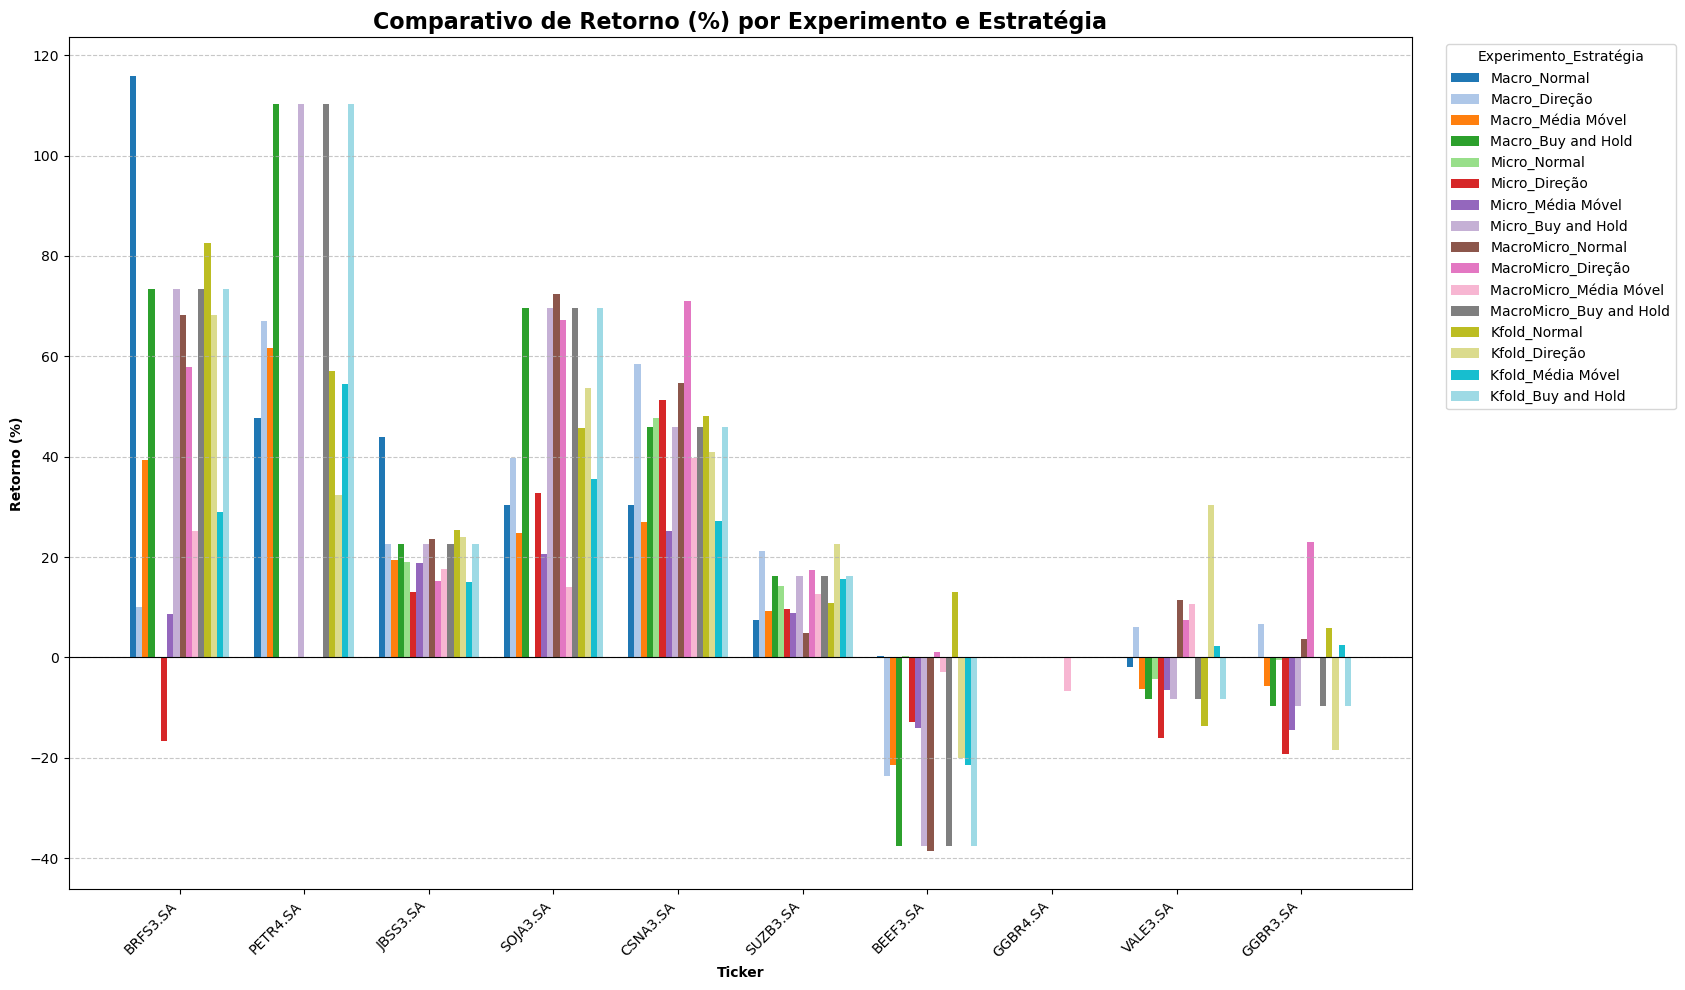

Plot generated.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
# Base directory for experiment results
experimentos_teste_dir = r"c:\Users\leona\pyhtonscripts\ExperimentosTeste"

# Define experiment types and strategies
experimentos = ["Macro", "Micro", "MacroMicro", "Kfold"]
estrategias = {
    "Normal": "melhores_resultados.csv", # Assuming this file contains the 'Normal'/'Previsões Originais' strategy results
    "Direção": "melhores_resultados_direcao.csv",
    "Média Móvel": "melhores_resultados_mediamovel.csv",
    "Buy and Hold": "melhores_resultados_buyhold.csv"
}

# --- Data Loading and Preparation ---
dfs_to_merge = []

print("Loading results data...")

for exp in experimentos:
    exp_dir = os.path.join(experimentos_teste_dir, f"{exp}Resultados") # e.g., MacroResultados
    if not os.path.exists(exp_dir):
        print(f"Warning: Directory not found for experiment '{exp}': {exp_dir}")
        continue

    for nome_estrategia, nome_arquivo in estrategias.items():
        file_path = os.path.join(exp_dir, nome_arquivo)

        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                # Ensure required columns exist
                if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                    # Select and rename columns
                    col_name = f"Retorno_{exp}_{nome_estrategia}"
                    df_subset = df[['Ticker', 'Retorno (%)']].copy()
                    df_subset.rename(columns={'Retorno (%)': col_name}, inplace=True)
                    df_subset.set_index('Ticker', inplace=True)
                    dfs_to_merge.append(df_subset)
                    print(f"  Loaded: {exp} - {nome_estrategia}")
                else:
                    print(f"Warning: Missing 'Ticker' or 'Retorno (%)' in {file_path}")
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
        else:
            # Check if the base 'melhores_resultados.csv' exists for the 'Normal' strategy if specific file is missing
            if nome_estrategia == "Normal" and exp == "Macro":
                 # Special case check for Macro/melhores_resultados.csv based on attachment #melhores_resultados.csv path
                 alt_file_path = os.path.join(experimentos_teste_dir, "Macro", "melhores_resultados.csv")
                 if os.path.exists(alt_file_path):
                     try:
                         df = pd.read_csv(alt_file_path)
                         if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                             col_name = f"Retorno_{exp}_{nome_estrategia}"
                             df_subset = df[['Ticker', 'Retorno (%)']].copy()
                             df_subset.rename(columns={'Retorno (%)': col_name}, inplace=True)
                             df_subset.set_index('Ticker', inplace=True)
                             dfs_to_merge.append(df_subset)
                             print(f"  Loaded: {exp} - {nome_estrategia} (from {alt_file_path})")
                         else:
                             print(f"Warning: Missing 'Ticker' or 'Retorno (%)' in {alt_file_path}")
                     except Exception as e:
                         print(f"Error loading {alt_file_path}: {e}")
                 else:
                    print(f"Warning: File not found for {exp} - {nome_estrategia}: {file_path} and {alt_file_path}")
            else:
                print(f"Warning: File not found for {exp} - {nome_estrategia}: {file_path}")


# --- Merging Data ---
if not dfs_to_merge:
    print("\nError: No data loaded. Cannot generate plot.")
else:
    merged_df = pd.concat(dfs_to_merge, axis=1)
    merged_df.fillna(0, inplace=True) # Replace NaN with 0 for plotting
    print("\nData merged successfully.")
    # print("\nMerged DataFrame head:\n", merged_df.head()) # Optional: print head to check

    # --- Plotting ---
    print("\nGenerating plot...")
    n_strategies_exp = len(merged_df.columns)
    n_tickers = len(merged_df.index)
    bar_width = 0.8 / n_strategies_exp # Adjust bar width based on number of bars per group
    index = np.arange(n_tickers)

    fig, ax = plt.subplots(figsize=(20, 10)) # Wider figure

    # Define a color map or list for distinction
    colors = plt.cm.get_cmap('tab20', n_strategies_exp) # Using tab20 colormap

    for i, col in enumerate(merged_df.columns):
        bar_position = index + i * bar_width - (n_strategies_exp * bar_width / 2) + bar_width / 2
        ax.bar(bar_position, merged_df[col], bar_width, label=col.replace("Retorno_", ""), color=colors(i))

    ax.set_xlabel('Ticker', fontweight='bold')
    ax.set_ylabel('Retorno (%)', fontweight='bold')
    ax.set_title('Comparativo de Retorno (%) por Experimento e Estratégia', fontweight='bold', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(merged_df.index, rotation=45, ha="right") # Rotate labels
    ax.legend(title="Experimento_Estratégia", bbox_to_anchor=(1.02, 1), loc='upper left')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(0, color='black', linewidth=0.8) # Add horizontal line at y=0

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show()
    print("Plot generated.")
